Questions:
Answer these questions with graphs and tables and paste your coding here.

#### 1. Show datatype for each variable and summary of the variables?

In [65]:
import pandas
import numpy as np
df = pandas.read_csv('Startups.csv')
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


#### 2. Show the descriptive statistic for the data frame?

In [66]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### 3. Create histogram and boxplot for independent variables to understand the distribution and skewness (mention which one has right or left skewness or has normal distribution)?

/var/folders/p3/vzn3lx257fl9kxj8f1lgfc_m0000gn/T/ipykernel_17530/2937208330.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(column=["R&D Spend","Administration","Marketing Spend"],ax = ax)


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>, <AxesSubplot:>]],
      dtype=object)

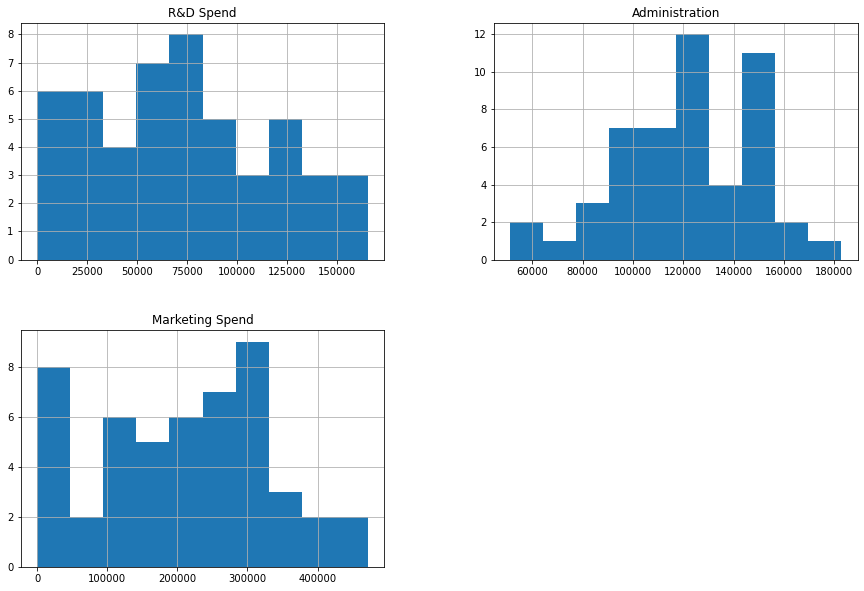

In [67]:
import matplotlib.pyplot as plt

histfigs = plt.figure(figsize = (15,10))
ax = histfigs.gca()
# Profit is not considered an independent variable so I did not plot the histogram for it
df.hist(column=["R&D Spend","Administration","Marketing Spend"],ax = ax)

<AxesSubplot:>

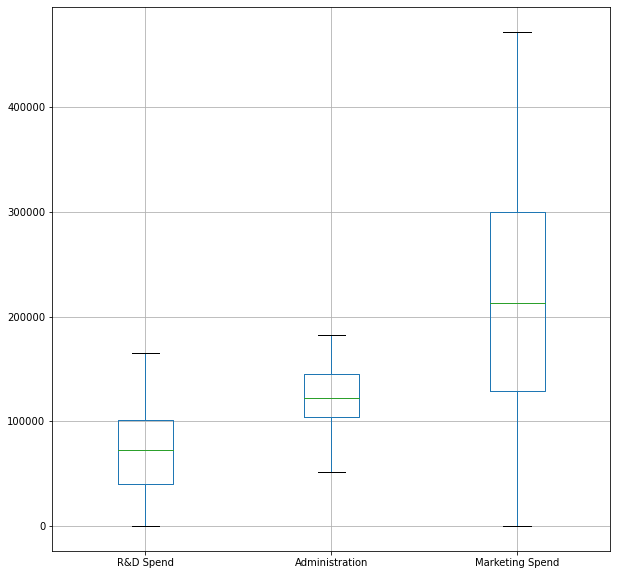

In [68]:
boxpltfigs = plt.figure(figsize = (10,10))
# Same thing as above Profit column is not an independent variable
df.boxplot(column=["R&D Spend","Administration","Marketing Spend"])

In [69]:
df.skew()

/var/folders/p3/vzn3lx257fl9kxj8f1lgfc_m0000gn/T/ipykernel_17530/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

### Looking at the histograms and boxplot as well as skewness i would describe each one of the variables as the following

### R&D Spend - Slightly skewed to the right however mostly normaly distribution

### Administration - Skewed to the left

### Marketing Spend - Slightly skewed to the left but easily the most normal distributed independent variable

#### 4. Which one of independent variables has the highest variability?

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64
14954920097.42379


/var/folders/p3/vzn3lx257fl9kxj8f1lgfc_m0000gn/T/ipykernel_17530/293106706.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  array = df.var()


<AxesSubplot:>

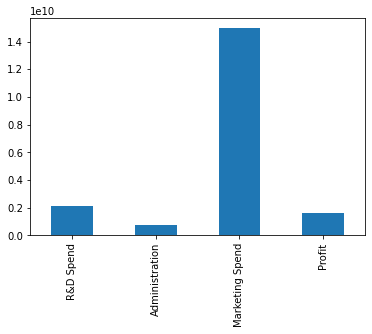

In [70]:
array = df.var()
print(array)
print(max(array))
array.plot.bar()

### The independent variable with the highest variabilitiy is Marketing Spend

#### 5. Which one of these independent variables is positively correlated with dependent variables?

R&D
 0.9729004656594832
Administration
 0.20071656826872128
Marketing Spend
 0.7477657217414767


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

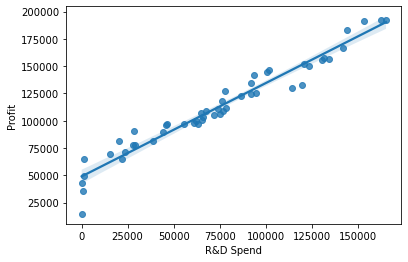

In [71]:
import seaborn as sns

print("R&D\n",df["R&D Spend"].corr(df["Profit"]))

print("Administration\n",df["Administration"].corr(df["Profit"]))

print("Marketing Spend\n",df["Marketing Spend"].corr(df["Profit"]))

sns.regplot(x=df["R&D Spend"], y=df["Profit"])

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

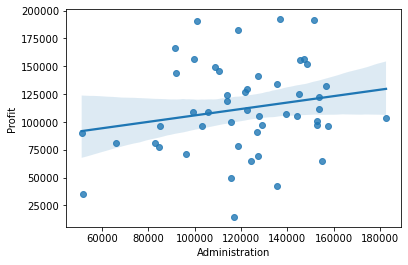

In [72]:
sns.regplot(x=df["Administration"], y=df["Profit"])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

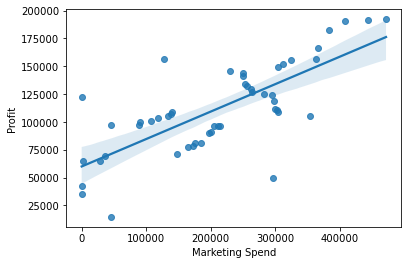

In [73]:
sns.regplot(x=df["Marketing Spend"], y=df["Profit"])

### The independent variable which is positively correlated with dependent variables of Profit is R&D Spend

#### 6. Which one of the States has highest profit?

<AxesSubplot:xlabel='State'>

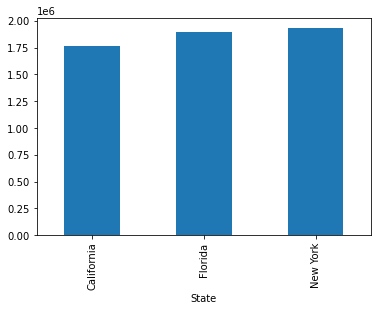

In [74]:
barplot = df.groupby("State")["Profit"].sum()
barplot.plot.bar()

### The States that has the highest profit is New York as seen from the bar plot

#### 7. Will a company that spends more on marketing perform better (higher profit) or a company spends less on marketing?

Highest Marketing
 R&D Spend           165349.2
Administration      136897.8
Marketing Spend     471784.1
State               New York
Profit             192261.83
Name: 0, dtype: object

Lowest Marketing
 R&D Spend            86419.7
Administration     153514.11
Marketing Spend          0.0
State               New York
Profit             122776.86
Name: 19, dtype: object


<AxesSubplot:title={'center':'Marketing V Profit'}, xlabel='Marketing Spend'>

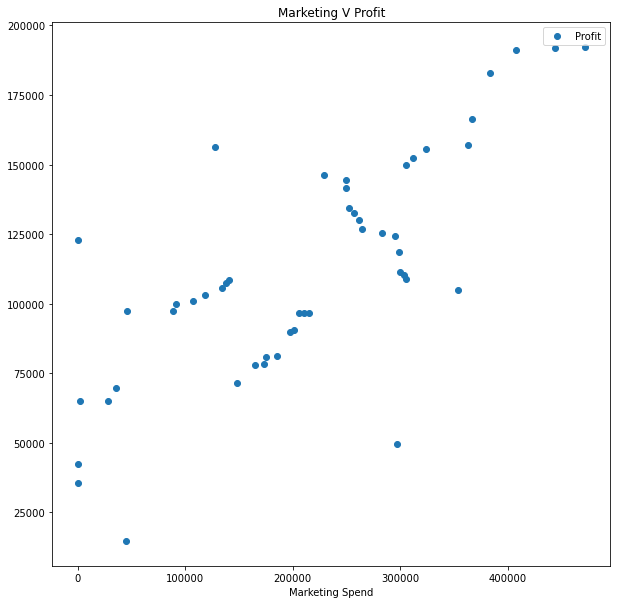

In [75]:
print("Highest Marketing\n",df.loc[df["Marketing Spend"].idxmax()])
print("\nLowest Marketing\n",df.loc[df["Marketing Spend"].idxmin()])

df.plot(x='Marketing Spend', y='Profit', style='o',title="Marketing V Profit",figsize=(10,10))

### If a company spends more on marketing they perform Better than the one who perform less looking at the plot

#### 8. Create pairwise comparison graph.

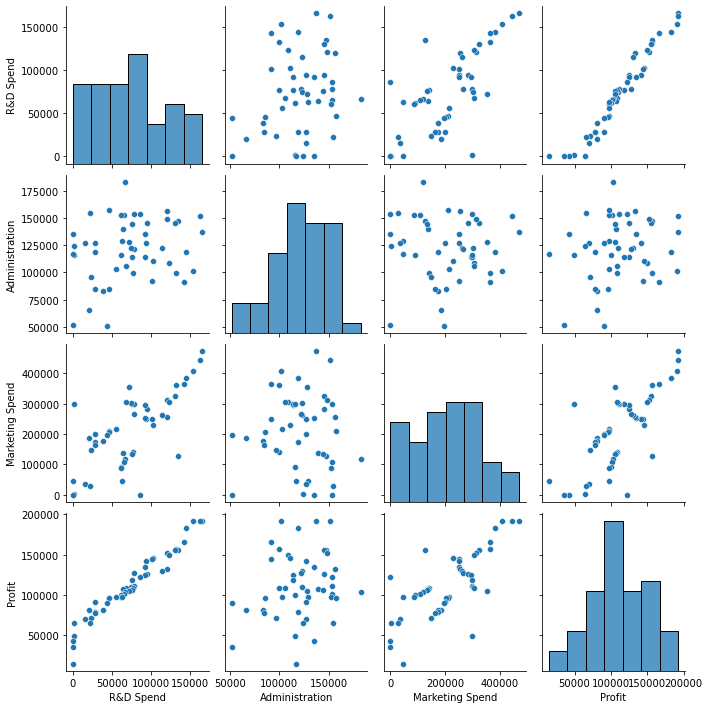

In [76]:
sns.pairplot(df)
plt.show()